In [1]:
# prompt: drive connect

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/CyberThreatAnalysisAndMitigation/dataset/Training.csv'

data = pd.read_csv(file_path)

data['status'].head()

,status
0,legitimate
1,phishing
2,phishing
3,legitimate
4,legitimate


In [3]:
file_path_2 = '/content/drive/MyDrive/CyberThreatAnalysisAndMitigation/dataset/Testing.csv'
data2 = pd.read_csv(file_path_2)

# Check the unique values in the 'status' column
print(data['status'].value_counts())

print(data2['status'].value_counts())

status
legitimate    3829
phishing      3829
Name: count, dtype: int64
status
phishing      1886
legitimate    1886
Name: count, dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

#split the data into features and labels

X = data.drop(columns=['url','status'])
y = data['status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6126, 87), (1532, 87), (6126,), (1532,))

In [9]:
import pandas as pd
import numpy as np
import re
from urllib.parse import urlparse
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump


# Encode the 'status' column
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

def extract_features(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname if parsed_url.hostname else ''
    path = parsed_url.path if parsed_url.path else ''

    features = {
        'length_url': len(url),
        'length_hostname': len(hostname),
        'ip': int(bool(re.match(r'\d+\.\d+\.\d+\.\d+', hostname))),
        'nb_dots': url.count('.'),
        'nb_hyphens': url.count('-'),
        'nb_at': url.count('@'),
        'nb_qm': url.count('?'),
        'nb_and': url.count('&'),
        'nb_or': url.count('|'),
        'nb_eq': url.count('='),
        'nb_underscore': url.count('_'),
        'nb_tilde': url.count('~'),
        'nb_percent': url.count('%'),
        'nb_slash': url.count('/'),
        'nb_star': url.count('*'),
        'nb_colon': url.count(':'),
        'nb_comma': url.count(','),
        'nb_semicolon': url.count(';'),
        'nb_dollar': url.count('$'),
        'nb_space': url.count(' '),
        'nb_www': url.count('www'),
        'nb_com': url.count('.com'),
        'nb_dslash': url.count('//'),
        'http_in_path': int('http' in path.lower()),
        'https_token': int('https' in path.lower()),
        'ratio_digits_url': sum(c.isdigit() for c in url) / len(url),
        'ratio_digits_host': sum(c.isdigit() for c in hostname) / len(hostname),
        'nb_redirection': url.count('//'),
        'length_words_raw': len(re.findall(r'\w+', url)),
        'char_repeat': max([len(m.group(0)) for m in re.finditer(r'(.)\1*', url)], default=0),
        'shortest_word_length': min([len(word) for word in re.findall(r'\w+', url)], default=0),
        'longest_word_length': max([len(word) for word in re.findall(r'\w+', url)], default=0),
        'avg_word_length': np.mean([len(word) for word in re.findall(r'\w+', url)]) if re.findall(r'\w+', url) else 0
    }

    feature_order = [
        'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
        'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolon', 'nb_dollar',
        'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
        'nb_redirection', 'length_words_raw', 'char_repeat', 'shortest_word_length', 'longest_word_length', 'avg_word_length'
    ]

    return [features[feature] for feature in feature_order]

# Extract features from the dataset
data['features'] = data['url'].apply(extract_features)
features = np.array(data['features'].tolist())

# Split the data into features and labels
X = features
y = data['status']

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


# Save the model and scaler
model_path = '/content/drive/MyDrive/CyberThreatAnalysisAndMitigation/dataset/model/url_classifier_model2.joblib'
scaler_path = '/content/drive/MyDrive/CyberThreatAnalysisAndMitigation/dataset/model/scaler2.joblib'
dump(rf_model, model_path)
dump(scaler, scaler_path)




['/content/drive/MyDrive/CyberThreatAnalysisAndMitigation/dataset/model/scaler2.joblib']

In [10]:
import pandas as pd
import numpy as np
import re
from urllib.parse import urlparse
from joblib import load

# Load the trained model and scaler
model_path = '/content/drive/MyDrive/CyberThreatAnalysisAndMitigation/dataset/model/url_classifier_model2.joblib'
scaler_path = '/content/drive/MyDrive/CyberThreatAnalysisAndMitigation/dataset/model/scaler2.joblib'
model = load(model_path)
scaler = load(scaler_path)

def extract_features(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname if parsed_url.hostname else ''
    path = parsed_url.path if parsed_url.path else ''

    features = {
        'length_url': len(url),
        'length_hostname': len(hostname),
        'ip': int(bool(re.match(r'\d+\.\d+\.\d+\.\d+', hostname))),
        'nb_dots': url.count('.'),
        'nb_hyphens': url.count('-'),
        'nb_at': url.count('@'),
        'nb_qm': url.count('?'),
        'nb_and': url.count('&'),
        'nb_or': url.count('|'),
        'nb_eq': url.count('='),
        'nb_underscore': url.count('_'),
        'nb_tilde': url.count('~'),
        'nb_percent': url.count('%'),
        'nb_slash': url.count('/'),
        'nb_star': url.count('*'),
        'nb_colon': url.count(':'),
        'nb_comma': url.count(','),
        'nb_semicolon': url.count(';'),
        'nb_dollar': url.count('$'),
        'nb_space': url.count(' '),
        'nb_www': url.count('www'),
        'nb_com': url.count('.com'),
        'nb_dslash': url.count('//'),
        'http_in_path': int('http' in path.lower()),
        'https_token': int('https' in path.lower()),
        'ratio_digits_url': sum(c.isdigit() for c in url) / len(url),
        'ratio_digits_host': sum(c.isdigit() for c in hostname) / len(hostname),
        'nb_redirection': url.count('//'),
        'length_words_raw': len(re.findall(r'\w+', url)),
        'char_repeat': max([len(m.group(0)) for m in re.finditer(r'(.)\1*', url)], default=0),
        'shortest_word_length': min([len(word) for word in re.findall(r'\w+', url)], default=0),
        'longest_word_length': max([len(word) for word in re.findall(r'\w+', url)], default=0),
        'avg_word_length': np.mean([len(word) for word in re.findall(r'\w+', url)]) if re.findall(r'\w+', url) else 0
    }

    feature_order = [
        'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
        'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolon', 'nb_dollar',
        'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
        'nb_redirection', 'length_words_raw', 'char_repeat', 'shortest_word_length', 'longest_word_length', 'avg_word_length'
    ]

    return [features[feature] for feature in feature_order]

# Test URL
url = 'https://en.wikipedia.org/wiki/NBC_Nightly_News'

# Extract features
features = extract_features(url)

# Ensure the feature count matches the training data
print(f"Feature count: {len(features)}")

# Scale features
features_scaled = scaler.transform([features])

# Predict
prediction = model.predict(features_scaled)
output = 'malicious' if prediction[0] == 1 else 'legitimate'

print(f'The URL "{url}" is {output}')


Feature count: 33
The URL "https://en.wikipedia.org/wiki/NBC_Nightly_News" is legitimate


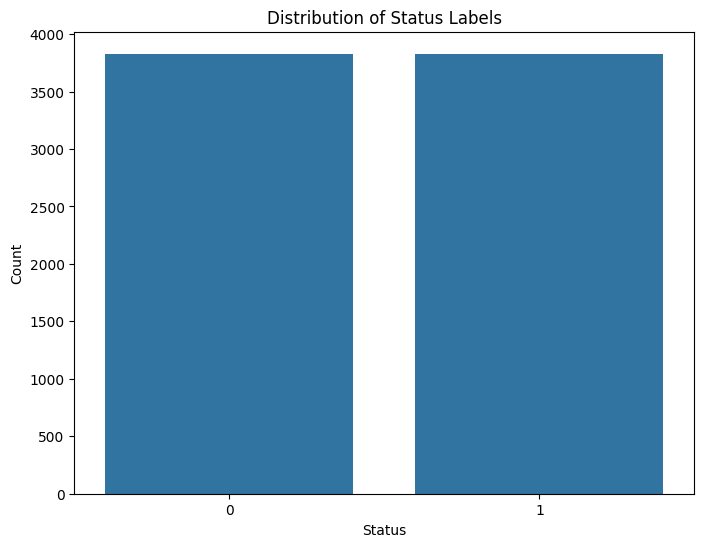

In [ ]:
# Plot the distribution of the 'status' column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data)
plt.title('Distribution of Status Labels')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


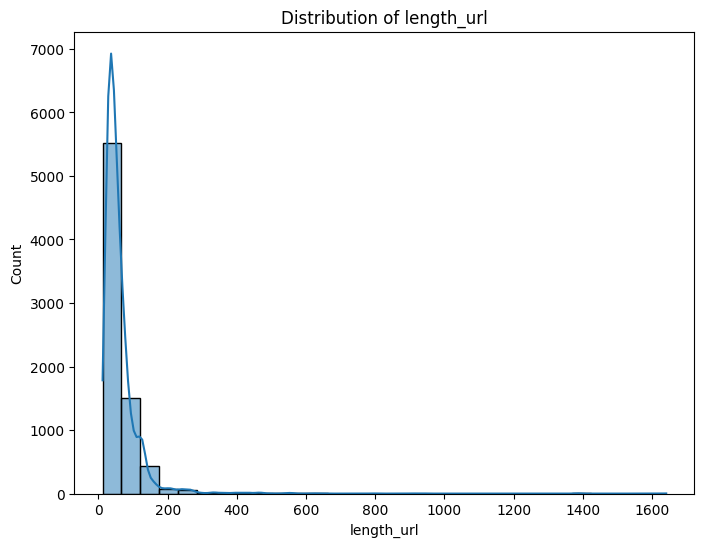

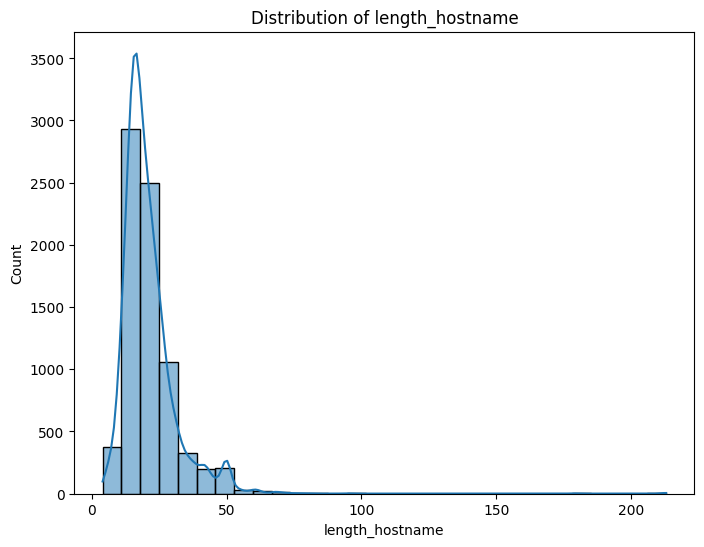

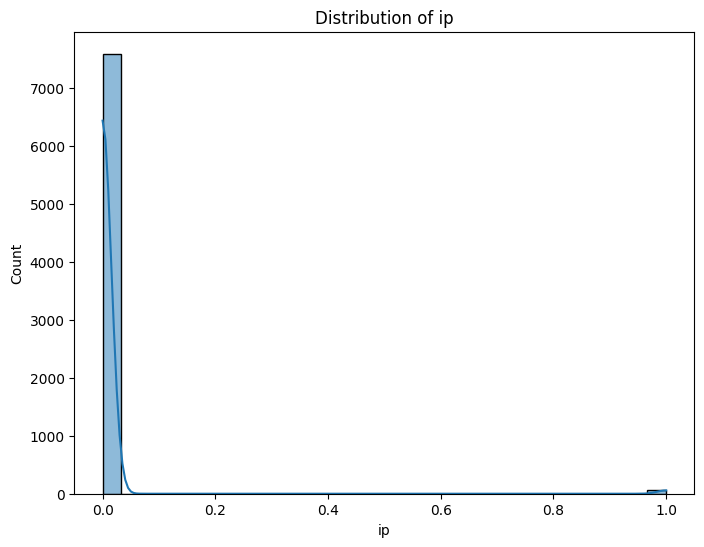

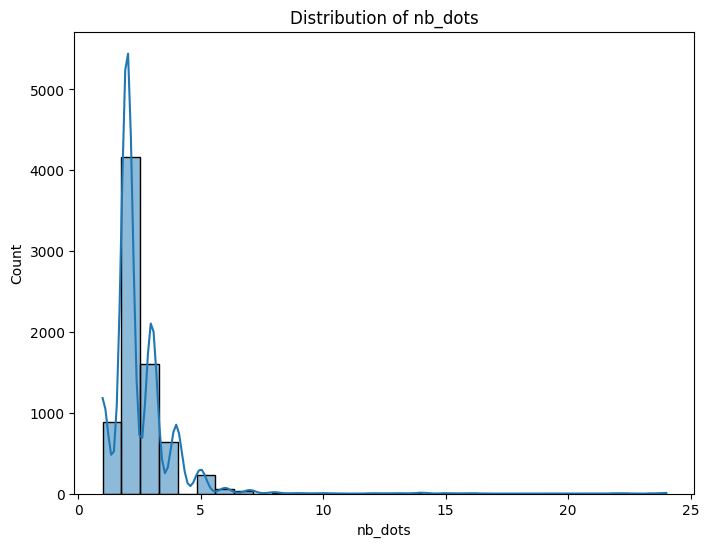

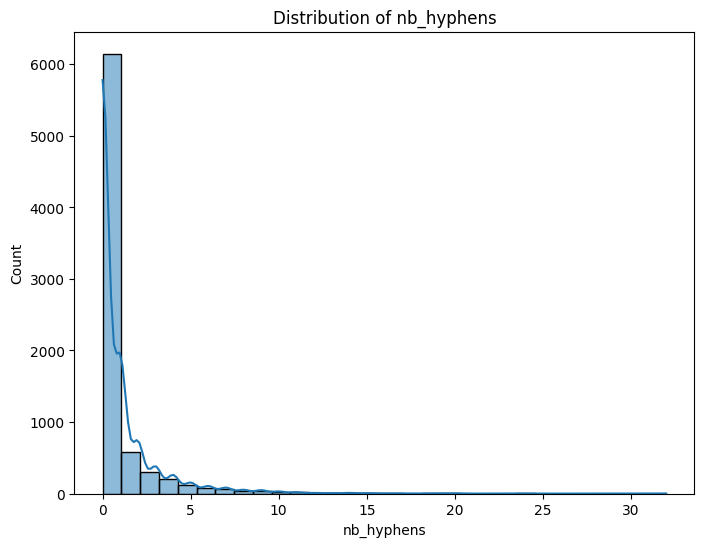

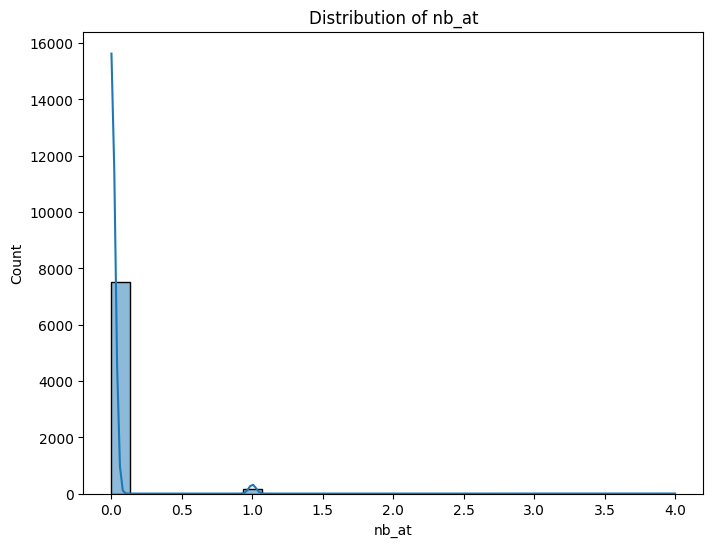

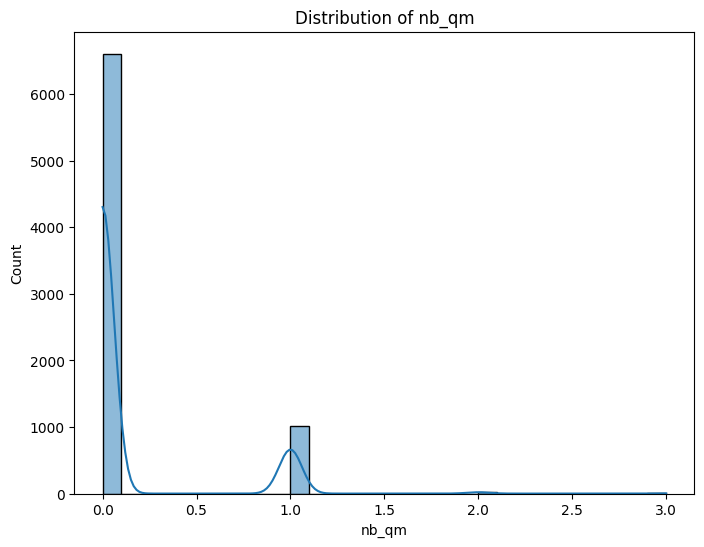

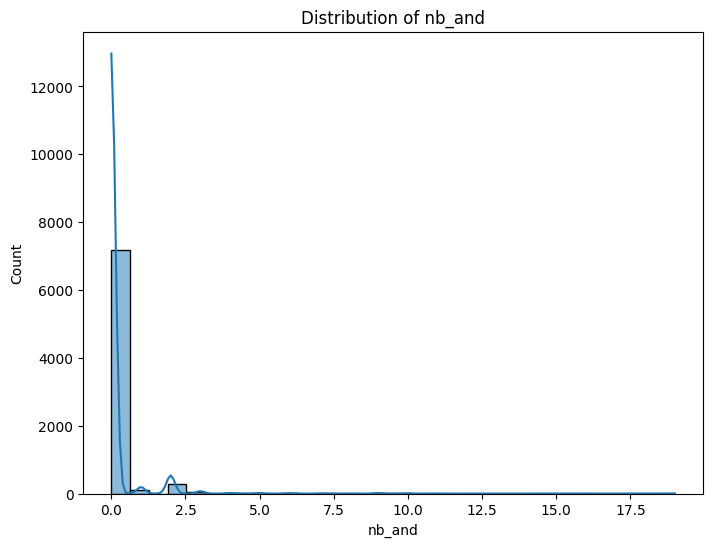

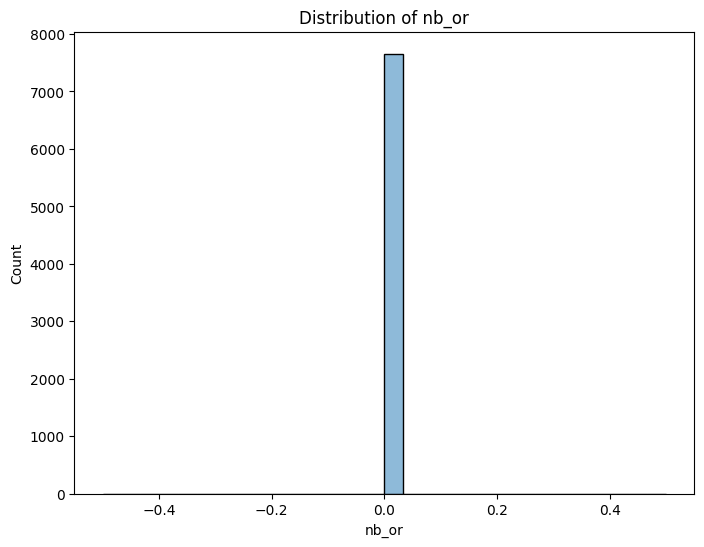

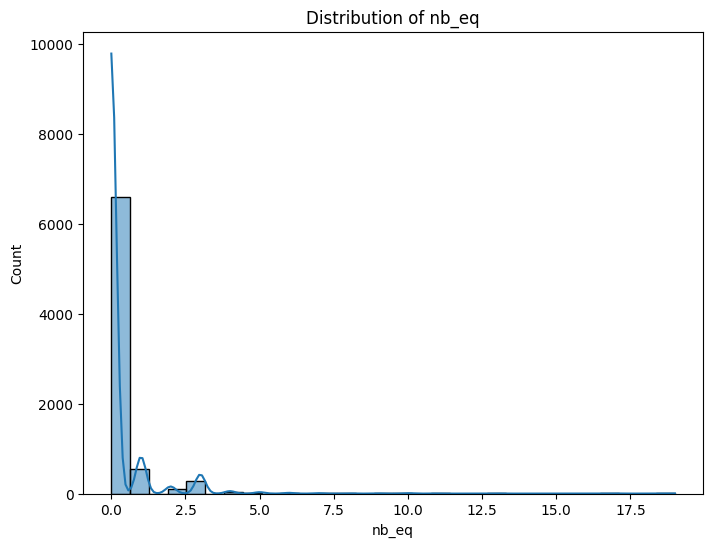

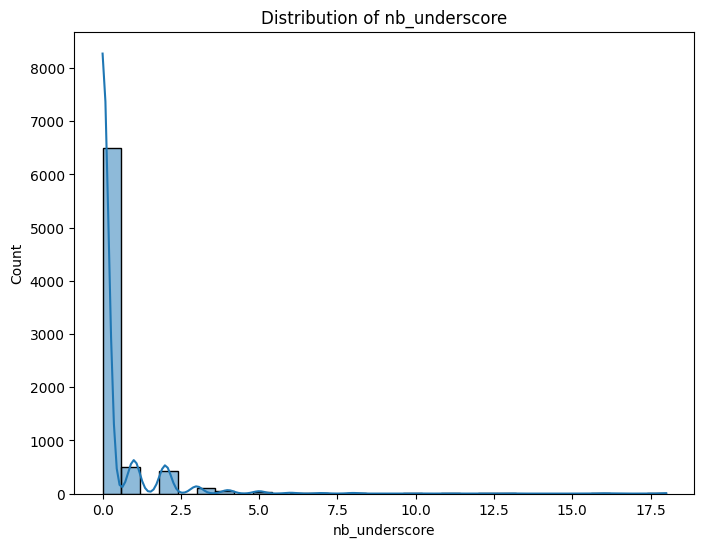

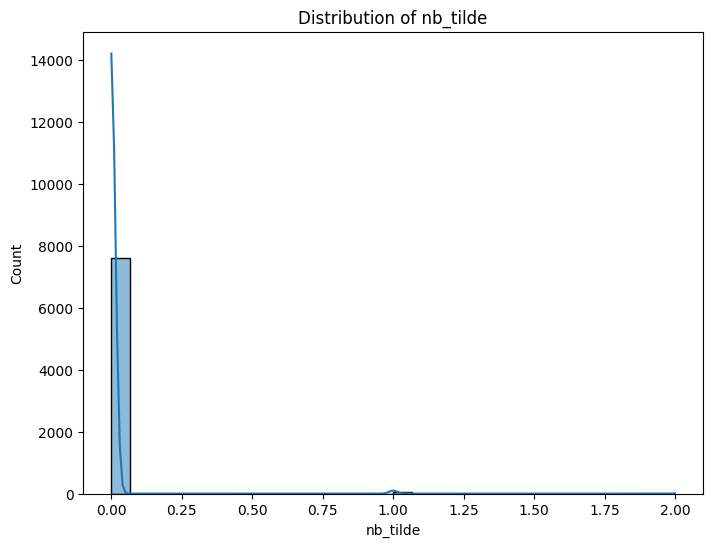

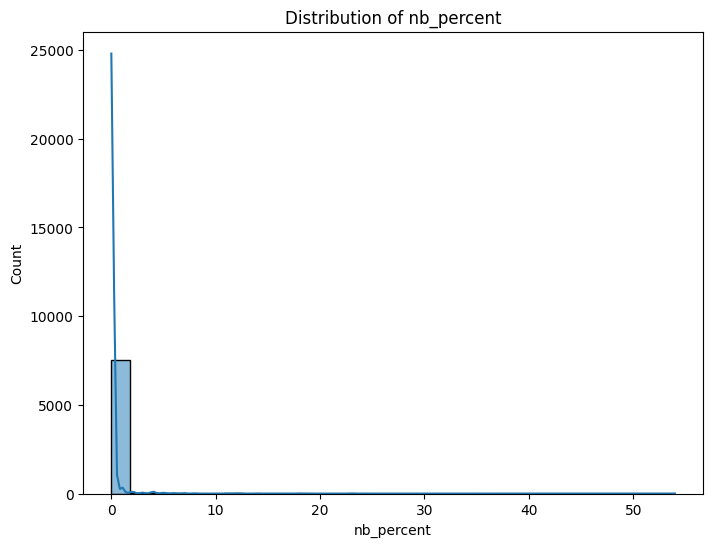

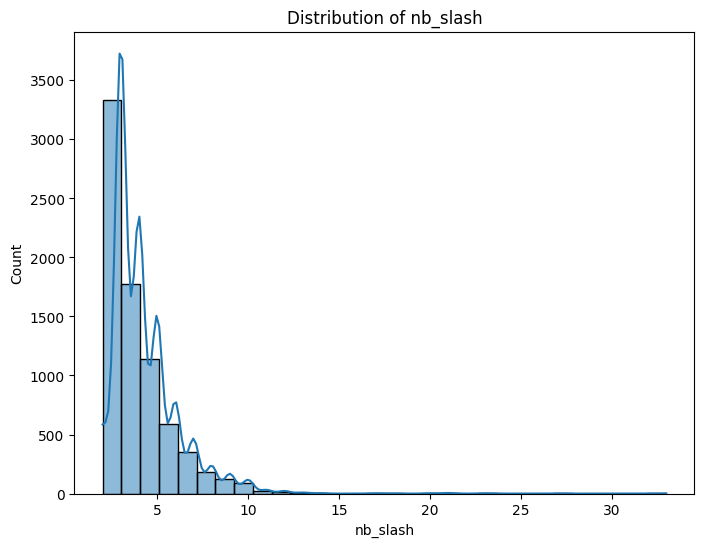

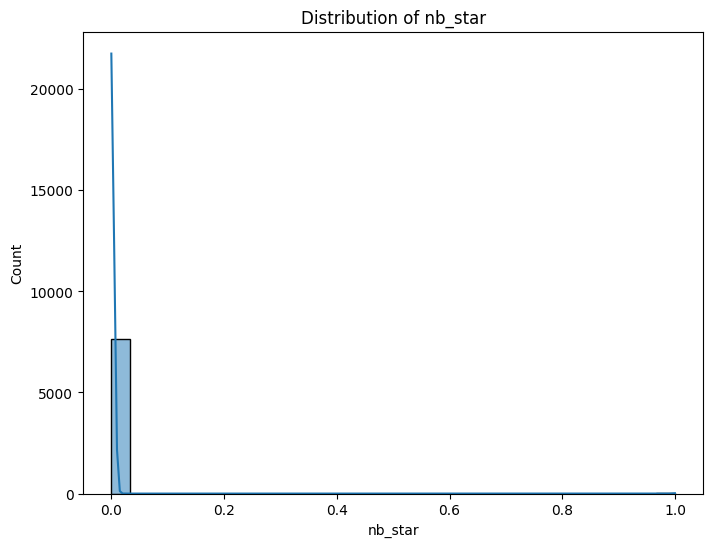

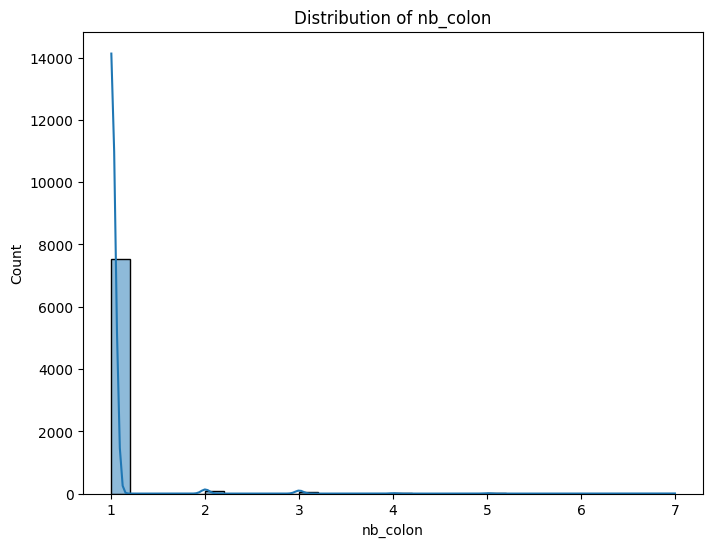

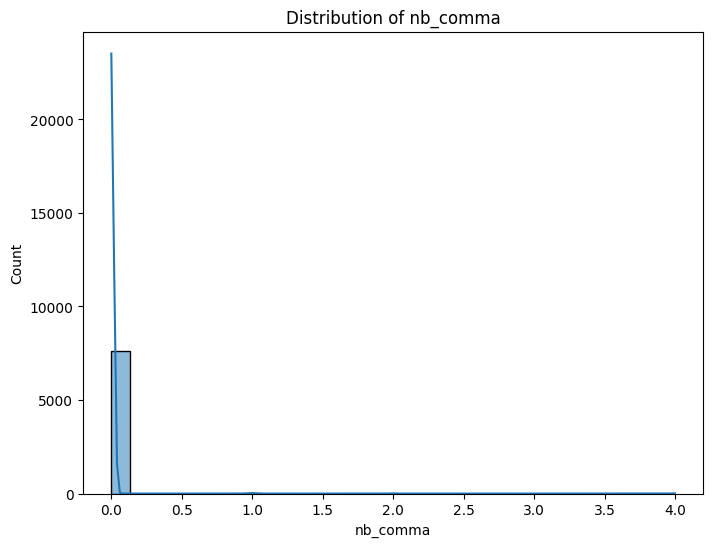

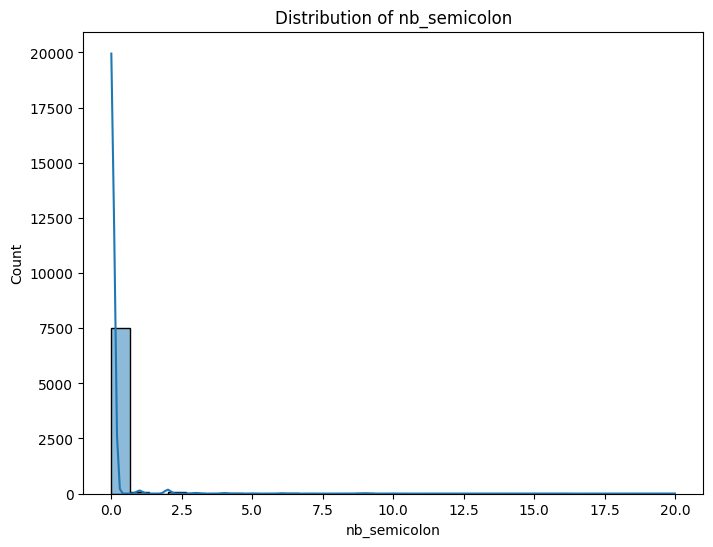

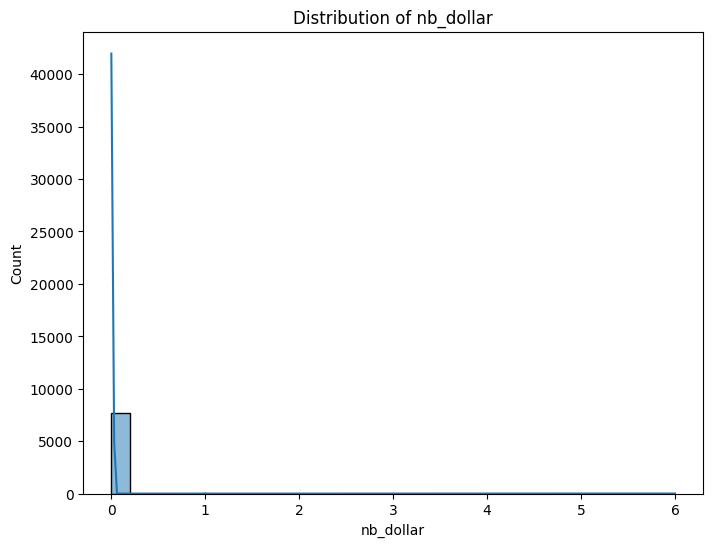

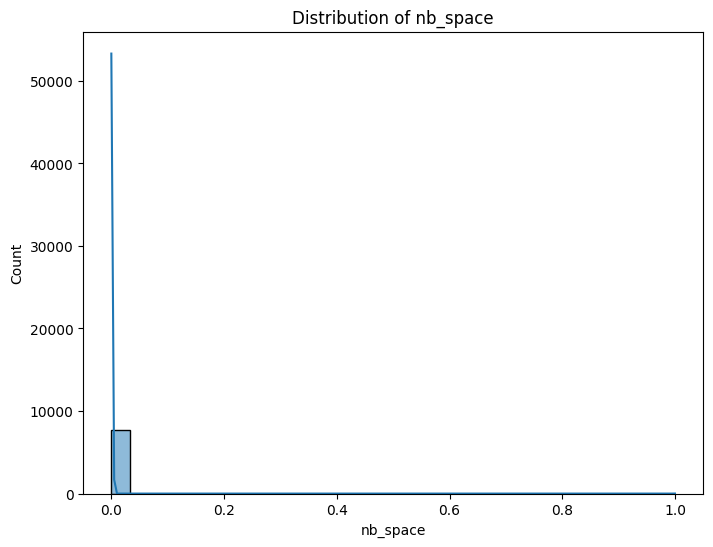

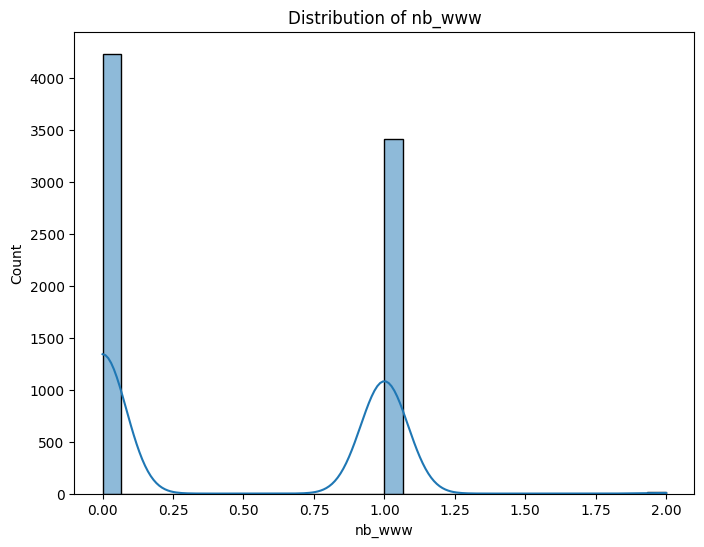

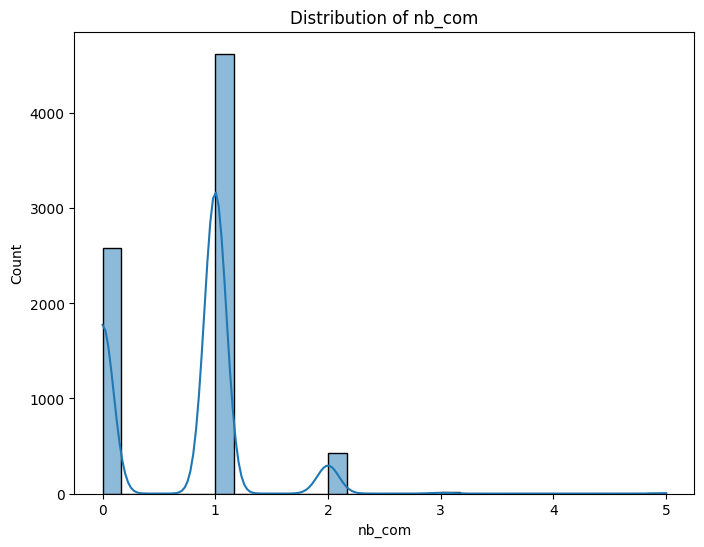

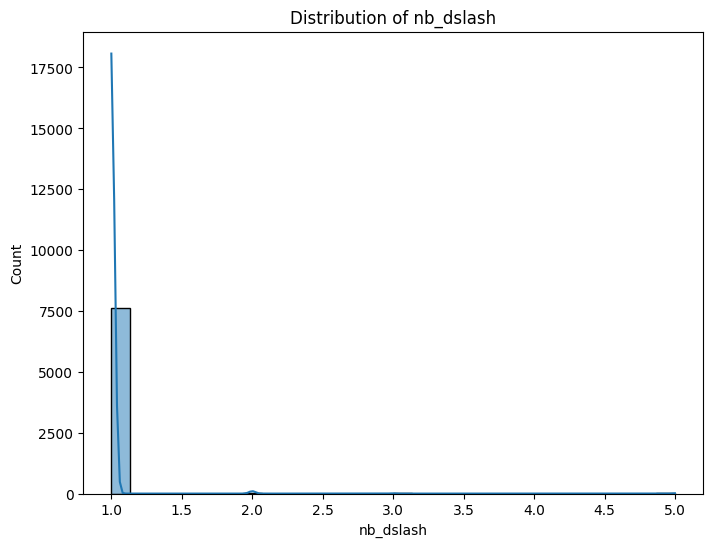

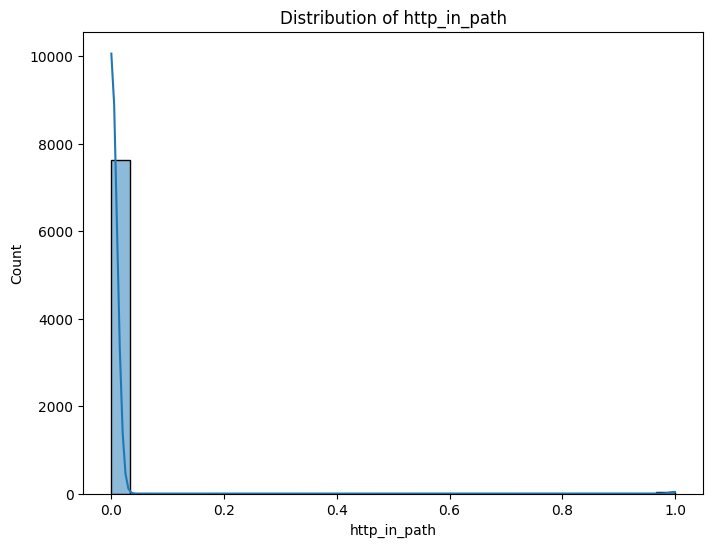

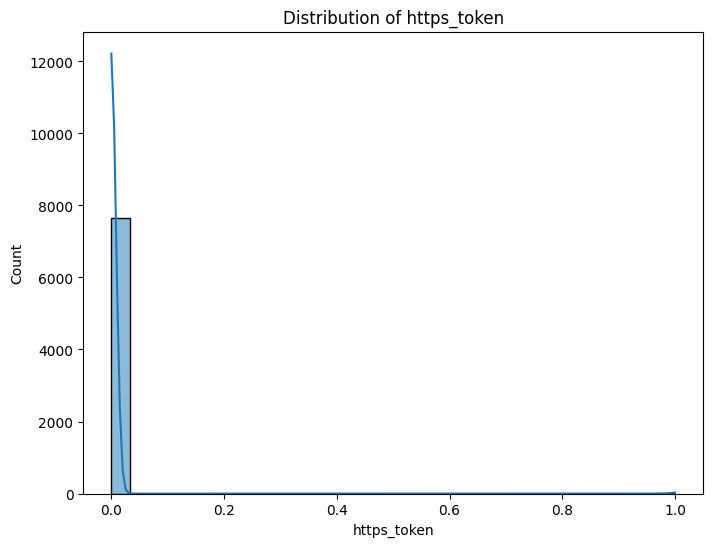

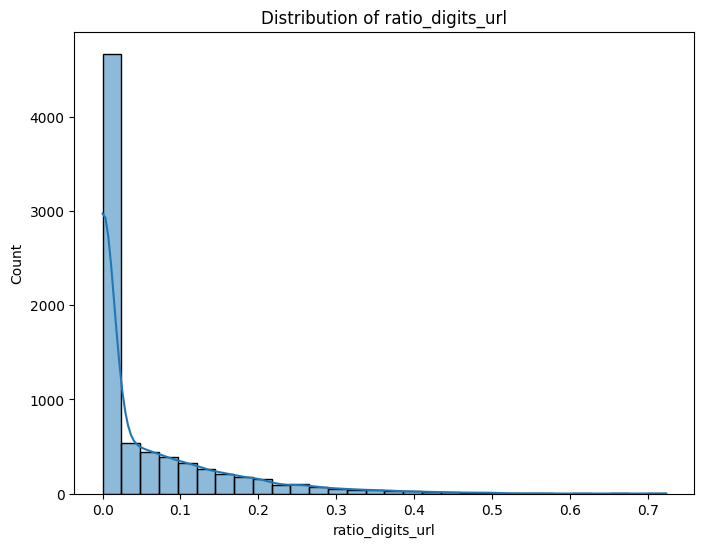

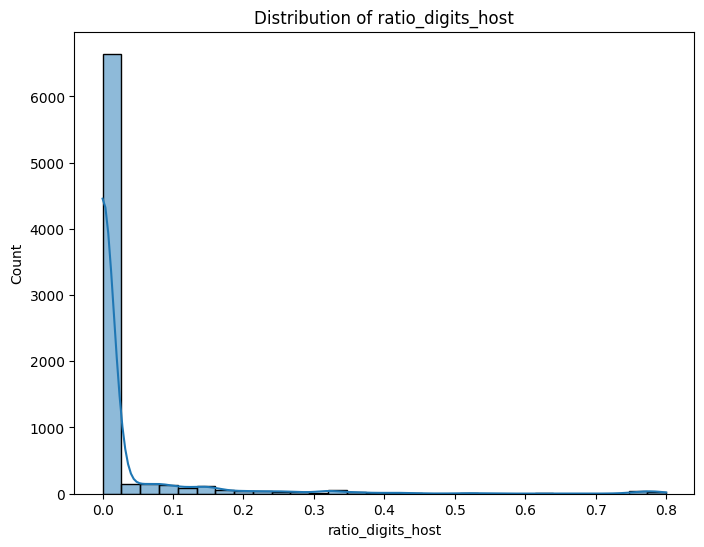

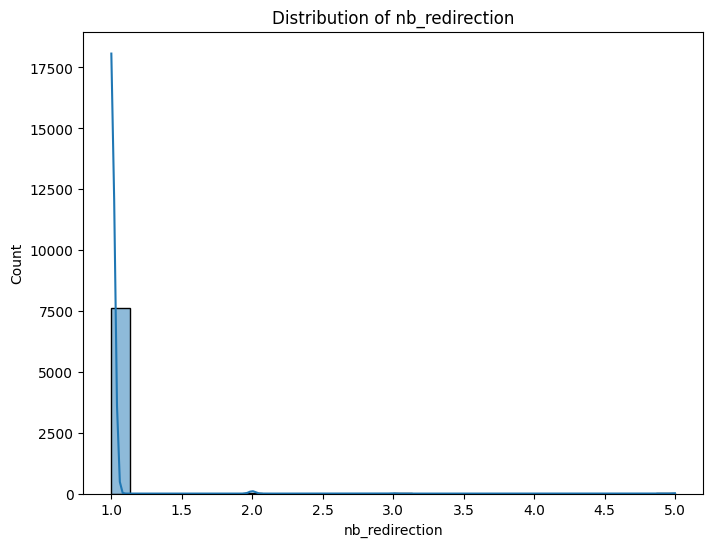

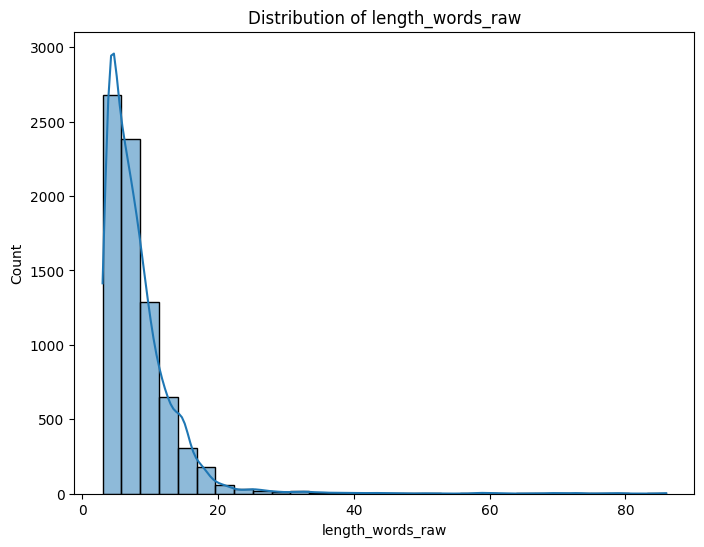

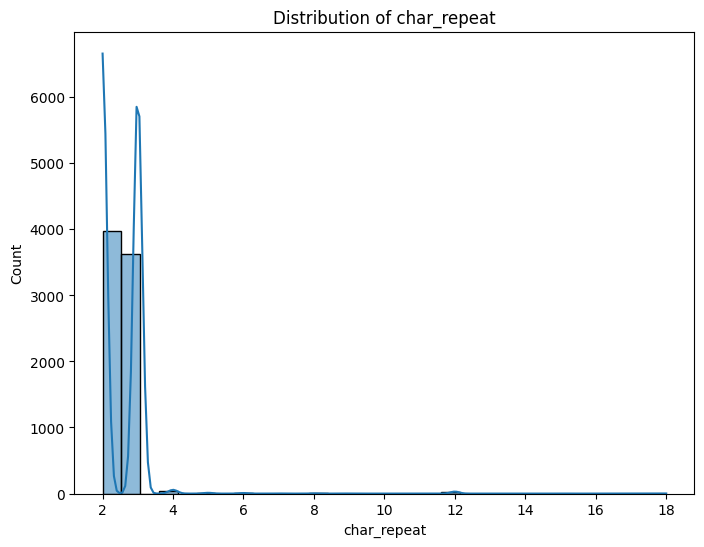

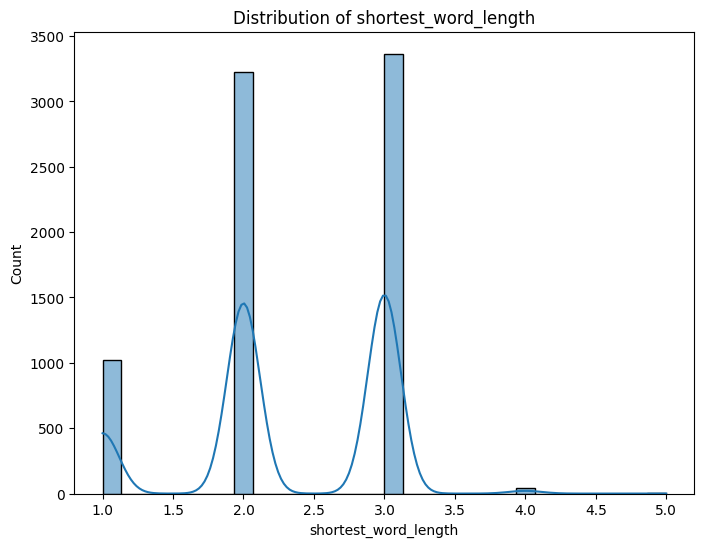

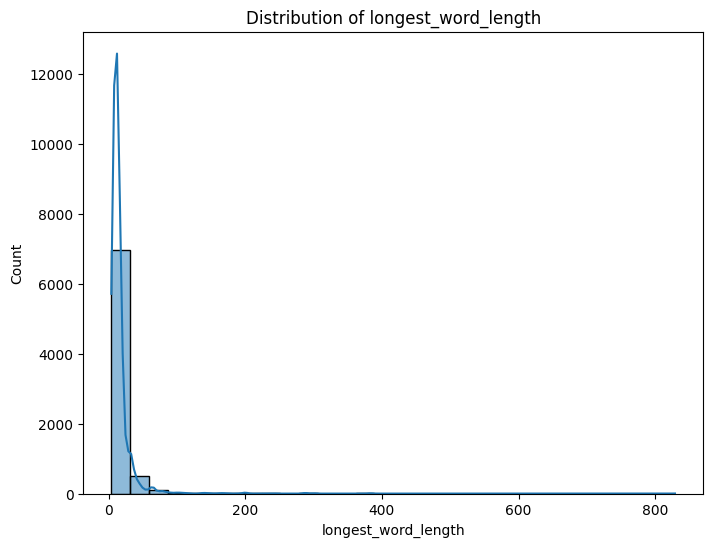

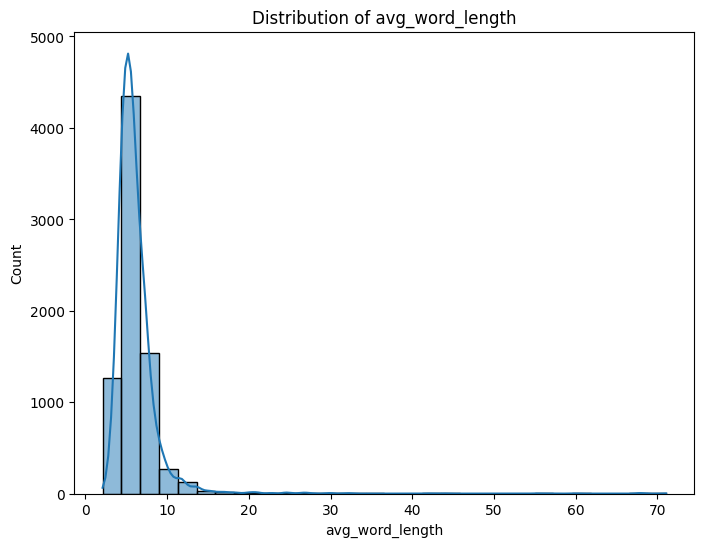

In [ ]:
# Convert features to a DataFrame for easier plotting
features_df = pd.DataFrame(features, columns=[
    'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
    'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolon', 'nb_dollar',
    'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
    'nb_redirection', 'length_words_raw', 'char_repeat', 'shortest_word_length', 'longest_word_length', 'avg_word_length'
])

# Plot the distribution of each feature
for feature in features_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(features_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


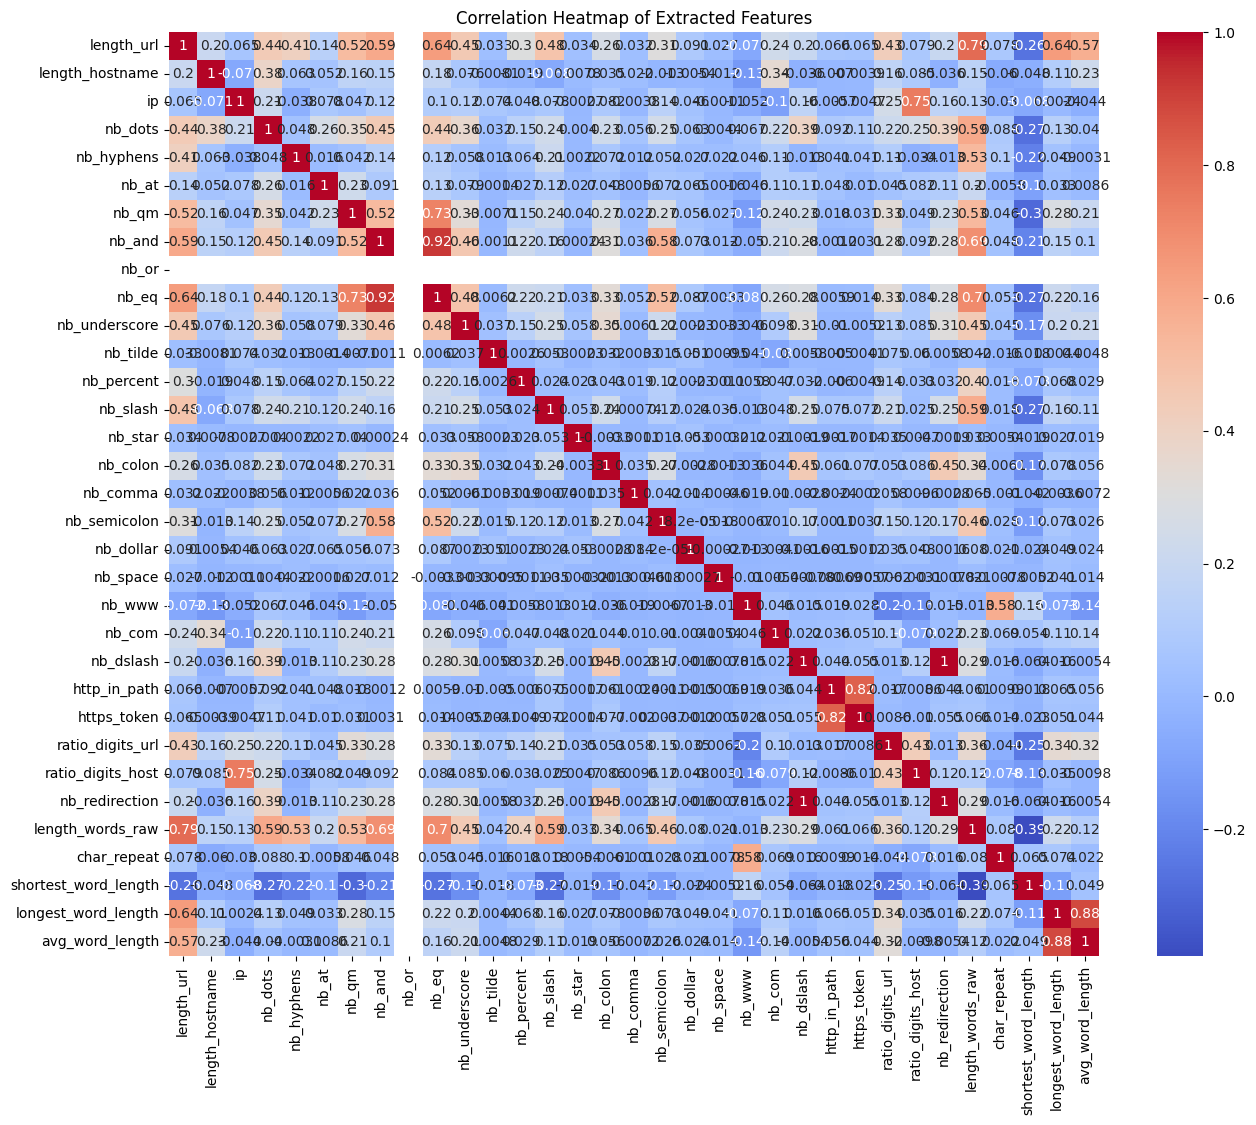

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(15, 12))
corr = features_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Extracted Features')
plt.show()


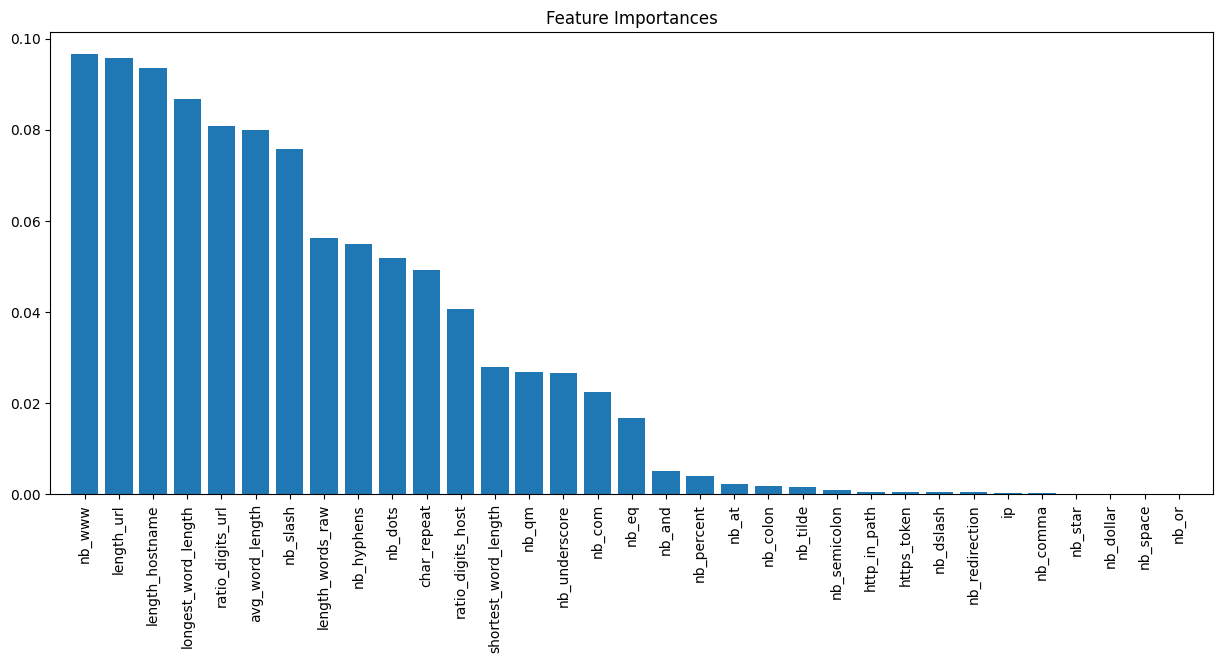

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features_df.columns

# Plot the feature importances
plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(features_df.shape[1]), importances[indices], align="center")
plt.xticks(range(features_df.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, features_df.shape[1]])
plt.show()


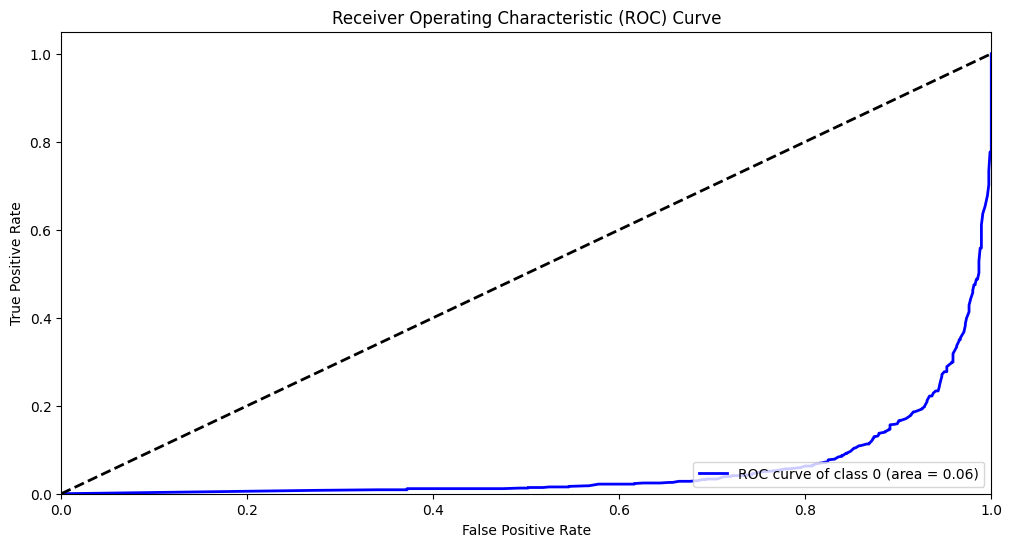

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 6))
for i, color in zip(range(n_classes), ['blue', 'red', 'green']):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


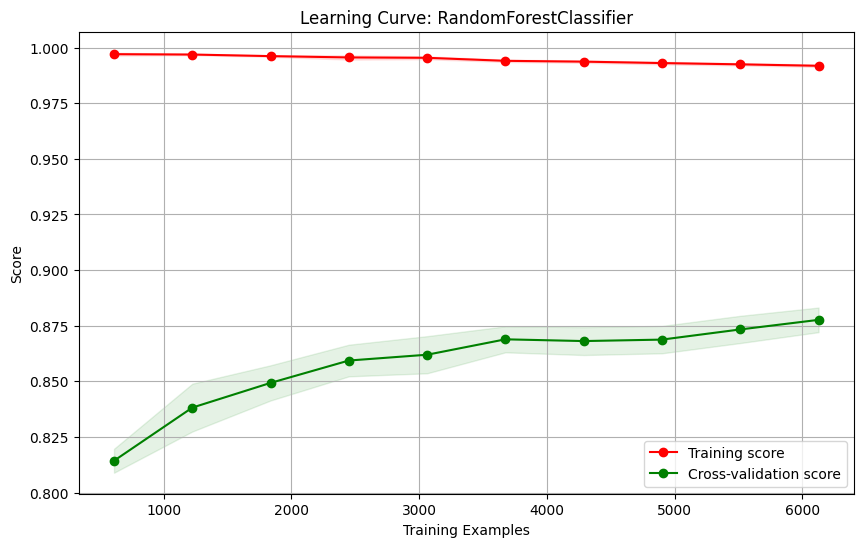

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and standard deviation of training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve: RandomForestClassifier")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


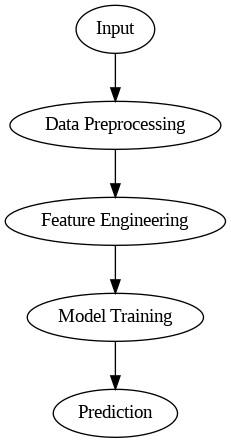

In [ ]:
import pydot
from IPython.display import Image, display

# Create a new graph
graph = pydot.Dot(graph_type='digraph')

# Nodes
nodes = ['Input', 'Data Preprocessing', 'Feature Engineering', 'Model Training', 'Prediction']

# Create nodes
for node in nodes:
    graph.add_node(pydot.Node(node))

# Edges
edges = [('Input', 'Data Preprocessing'),
         ('Data Preprocessing', 'Feature Engineering'),
         ('Feature Engineering', 'Model Training'),
         ('Model Training', 'Prediction')]

# Add edges
for edge in edges:
    graph.add_edge(pydot.Edge(edge[0], edge[1]))

# Save the graph as a PNG file
graph.write_png('flowchart.png')

# Display the graph
display(Image(filename='flowchart.png'))
